### Metrics

### GPU

In [33]:
import pandas as pd 

csv_directory = './../../MobileNeRF/results/chair/metrics/'
csv_directory = './../../MobileNeRF/results/chair/metrics3/'
csv_directory = './../../MobileNeRF/results/drumsStage2/metrics/'

file_path = csv_directory+'s1_gpu_memory_consumption_training.txt'


In [34]:
import ast
import pandas as pd
import json

# ... (Previous code remains unchanged)
import ast
import pandas as pd
import json

# Read the data from the file
with open(file_path, 'r') as file:
    data_str = file.read()

data_str = data_str.replace("'", "\"")
data_str = data_str.replace("datetime.datetime", "")
data_str = eval(data_str)

data_json = json.dumps(data_str)

data_list =json.loads(data_json)
# Flatten the data into a list of dictionaries
flattened_data = []
for entry in data_list:
    iteration = entry['iteration']
    query_time = entry['gpu_stats']['query_time']

    for gpu_info in entry['gpu_stats']['gpus']:
        flattened_entry = {
            'iteration': iteration,
            'query_time': query_time,
            'gpu_uuid': gpu_info['uuid'],
            'gpu_name': gpu_info['name'],
            'temperature_gpu': gpu_info['temperature.gpu'],
            'fan_speed': gpu_info['fan.speed'],
            'utilization_gpu': gpu_info['utilization.gpu'],
            'utilization_enc': gpu_info['utilization.enc'],
            'utilization_dec': gpu_info['utilization.dec'],
            'power_draw': gpu_info['power.draw'],
            'enforced_power_limit': gpu_info['enforced.power.limit'],
            'memory_used': gpu_info['memory.used'],
            'memory_total': gpu_info['memory.total'],
            'processes': gpu_info['processes']
        }

        flattened_data.append(flattened_entry)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(flattened_data)




In [35]:
df.head()

,iteration,query_time,gpu_uuid,gpu_name,temperature_gpu,fan_speed,utilization_gpu,utilization_enc,utilization_dec,power_draw,enforced_power_limit,memory_used,memory_total,processes
0,10000,"[2023, 12, 9, 11, 9, 21, 79803]",GPU-2f62eeba-0595-32c2-54af-3f3782ccf5e6,NVIDIA A100-SXM4-40GB,46,None,39,0,0,235,400,31102,40960,"[{'username': 'ogbuchic', 'command': 'python',..."
1,10000,"[2023, 12, 9, 11, 9, 21, 79803]",GPU-9bb84771-dd17-8f7d-00d4-9ea19223afc9,NVIDIA A100-SXM4-40GB,44,None,19,0,0,75,400,31088,40960,"[{'username': 'ogbuchic', 'command': 'python',..."
2,20000,"[2023, 12, 9, 11, 26, 6, 741128]",GPU-2f62eeba-0595-32c2-54af-3f3782ccf5e6,NVIDIA A100-SXM4-40GB,43,None,44,0,0,80,400,31112,40960,"[{'username': 'ogbuchic', 'command': 'python',..."
3,20000,"[2023, 12, 9, 11, 26, 6, 741128]",GPU-9bb84771-dd17-8f7d-00d4-9ea19223afc9,NVIDIA A100-SXM4-40GB,40,None,40,0,0,73,400,31100,40960,"[{'username': 'ogbuchic', 'command': 'python',..."
4,30000,"[2023, 12, 9, 11, 43, 53, 777266]",GPU-2f62eeba-0595-32c2-54af-3f3782ccf5e6,NVIDIA A100-SXM4-40GB,44,None,44,0,0,83,400,31118,40960,"[{'username': 'ogbuchic', 'command': 'python',..."


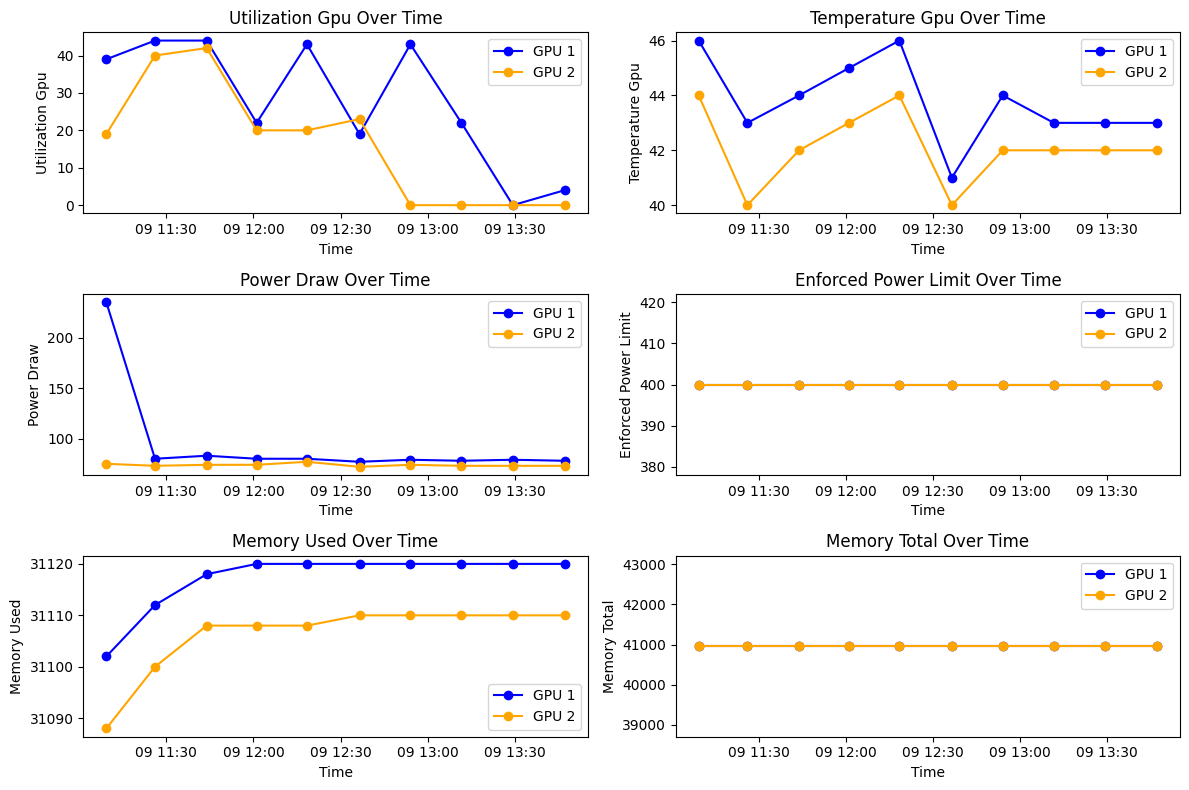

In [36]:


import matplotlib.pyplot as plt
from datetime import datetime

# Convert the 'query_time' column to datetime
df['query_time'] = df['query_time'].apply(lambda x: datetime(*x))

# Plot GPU metrics
plt.figure(figsize=(12, 8))

# Define a list of colors for each GPU
gpu_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Iterate over GPU metrics
gpu_metrics = ['utilization_gpu', 'temperature_gpu', 'power_draw', 'enforced_power_limit', 'memory_used', 'memory_total']

for i, metric in enumerate(gpu_metrics, start=1):
    plt.subplot(3, 2, i)

    # Iterate over GPUs and plot each one with a different color
    for j, gpu_uuid in enumerate(df['gpu_uuid'].unique()):
        gpu_data = df[df['gpu_uuid'] == gpu_uuid]
        plt.plot(gpu_data['query_time'], gpu_data[metric], label=f'GPU {j+1}', marker='o', color=gpu_colors[j])

    plt.title(f'{metric.replace("_", " ").title()} Over Time')
    plt.xlabel('Time')
    plt.ylabel(metric.replace("_", " ").title())
    plt.legend()

plt.tight_layout()
plt.show()

### General

In [37]:
import pandas as pd
import os

# Specify the directory containing your CSV files
csv_directory = './../../MobileNeRF/results/chair/metrics/'
csv_directory = './../../MobileNeRF/results/chair/metrics3/'
csv_directory = './../../MobileNeRF/results/drumsStage2/metrics/'

# Provide an array with the names of the CSV files (without the directory path)
csv_files = ['s1_test_results_test.csv', 's2_0_test_results_test.csv', 's2_1_test_results_test.csv', 's3_test_results_test.csv']  # Add more files as needed

result_list = []

# Iterate through each file in the specified array
for filename in csv_files:
    # Read the CSV file
    file_path = os.path.join(csv_directory, filename)
    df = pd.read_csv(file_path)

    # Calculate the average of 'psnrs_test' and 'ssim_values'
    avg_psnr = df['psnrs_test'].mean()
    avg_ssim = df['ssim_values'].mean()

    # Extract the stage name from the filename (you may need to adjust this based on your filenames)
    stage_name = os.path.splitext(filename)[0].replace("_test_results_test","")

    # Append the results to the list
    result_list.append({'Stage': stage_name, 'Average_PSNR': avg_psnr, 'Average_SSIM': avg_ssim})



# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(result_list)


txt_files = ['s1_total_training_time_training.txt', 's2_0_total_training_time_training.txt', 's2_1_total_training_time_training.txt', 's3_total_training_time_training.txt']  # Add more files as needed

iterations_stage=['']

result_time = []

time_hours = []

# Iterate through each file in the specified array
for filename in txt_files:
    # Read the contents of the text file
    file_path = os.path.join(csv_directory, filename)
    with open(file_path, 'r') as file:
        # Extract the total training time in seconds
        total_time_seconds = float(file.readline().split()[-2])

        # Convert seconds to hours
        total_time_hours = round(total_time_seconds / 3600.0,2)

        # Append the time in hours to the list
        time_hours.append(total_time_hours)

# Display the resulting array
#print(time_hours)
result_df["Time"]=time_hours
# Display the resulting table
print(result_df)


  Stage  Average_PSNR  Average_SSIM  Time
0    s1     24.529851      0.920485  2.94
1  s2_0     24.288962      0.917938  5.38
2  s2_1     24.338703      0.918712  3.01
3    s3     24.319582      0.918319  2.17
